In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
#matplotlib.style.use('ggplot')

## Loading the data ##

In [2]:
tweets = pd.read_csv('../input/demonetization-tweets.csv', encoding='latin1') #Load the data.
#data contains encoding, so encoding method is used or else the data wont be read by anaconda.
pd.set_option('display.max_colwidth', -1) #Want to see the full sentences in text column.
tweets = tweets.drop(['Unnamed: 0','X','replyToSN','replyToSID','id','replyToUID'],axis=1) #Remove unwanted column
tweets.head()

,text,favorited,favoriteCount,created,truncated,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;,False,0,2016-11-23 18:40:30,False,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",HASHTAGFARZIWAL,331,True,False
1,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,False,0,2016-11-23 18:40:29,False,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",PRAMODKAUSHIK9,66,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th",False,0,2016-11-23 18:40:03,False,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",rahulja13034944,12,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9,False,0,2016-11-23 18:39:59,False,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",deeptiyvd,338,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,False,0,2016-11-23 18:39:39,False,"<a href=""http://cpimharyana.com"" rel=""nofollow"">CPIMBadli</a>",CPIMBadli,120,True,False


## Extracting the RT's ##
Twitter tweets have @xyz, extracting them and setting them in a new column['Text_os].  

In [3]:
tweets['Text_os'] = '' 
tweets['Text_os'] = tweets['text'].str.extract('(@\w{0,})',expand = False)# @xyz
tweets['Text_os'] = tweets['Text_os'].str.strip('@')# Remove @ symbol -xyz
tweets['Text_os'] = tweets['Text_os'].fillna(0) # Fill nan value as 0
tweets['Text_os'] = tweets['Text_os'].replace('',0)

Converting True and False in few columns as 1(True) and 0(False), which will be used for latter analysis.

In [4]:
tweets['isRetweet'] = tweets['isRetweet']*1
tweets['retweeted'] = tweets['retweeted']*1
tweets['truncated'] = tweets['truncated']*1
tweets['favorited'] = tweets['favorited']*1

Extracting the information related to device used. I believe Maximum people in India would have android phone.  

In [5]:
tweets['Phone_use'] = tweets['statusSource'].str.extract('([A-Za-z]+\<)', expand = False)
tweets['Phone_use'] = tweets['Phone_use'].str.extract('([A-Za-z]+)', expand = True)
tweets.Phone_use.unique() 

array(['Android', 'CPIMBadli', 'Client', nan, 'iPhone', 'Phone', 'IFTTT',
       'Facebook', 'Windows', 'TweetDeck', 'iPad', 'Hootsuite',
       'RoundTeam', 'Google', 'BlackBerry', 'com', 'i', 'SocialNewsXYZ',
       'Drivespark', 'Instagram', 'it', 'Social', 'Buffer', 'Mac', 'AI',
       'Ads', 'HubSpot', 'SocialOomph', 'Twitter', 'Peregrine',
       'NetCatNews', 'in', 'GrabInbox', 'MetroTwit', 'Widget',
       'HeaderLabs', 'LinkedIn', 'cryptohawk', 'Update', 'bitcoinagile',
       'iOS', 'IEFX', 'li', 'TwixxyBot', 'bot', 'Echofon', 'Nuzzel',
       'Junction', 'Dabr', 'RealEstateBot', 'Studio', 'Singapore', 'Buzz',
       'Lite', 'growth', 'Post', 'co', 'YoruFukurou', 'cmssocialservice',
       'TwitterTrafficMachine', 'Klout', 'trump', 'Big', 'Twitterrific',
       'App', 'SCBotBackend', 'CoSchedule', 'Integration', 'easypybot',
       'PostBeyond', 'Sprinklr', 'agileminderbot', 'Publisher', 'Quora',
       'IEHIAutoPost', 'Pluggio', 'OccuWorld', 'SocioAdvocacy', 'Edgar',
       

### Analyzing India's device choice ###
Devices and systems used to send the tweets. 
I considered only main devices available in Indian Market. Android, Apple, Blackberry, Windows Phone , Twitter Website and via Other device and services....
Note: iPhone, iPad, Mac, i has been coincided as Apple Phone

In [6]:
replace_words =['CPIMBadli','Facebook','SocialNewsXYZ','Instagram',
'AI','NGO','Junction', 'Dabr', 'RealEstateBot', 'Studio', 'Singapore', 'Buzz',
'TwitterTrafficMachine', 'Klout', 'trump', 'Big', 'Twitterrific','Lite','growth', 'Post', 'co', 'YoruFukurou', 'cmssocialservice','IFTTT', 'TweetDeck', 'Hootsuite', 'RoundTeam', 'Google','com', 'Drivespark', 'it', 'Social', 'Buffer','Ads', 'HubSpot','GrabInbox', 'MetroTwit', 'Widget', 'HeaderLabs', 'LinkedIn',
 'cryptohawk', 'Update', 'bitcoinagile', 'iOS', 'IEFX', 'li','TwixxyBot', 'bot', 'Echofon', 'Nuzzel', 'App', 'SCBotBackend',
 'easypybot', 'PostBeyond', 'Sprinklr', 'agileminderbot','Publisher', 'Quora', 'IEHIAutoPost', 'Pluggio', 'OccuWorld',
'SocioAdvocacy', 'Edgar', 'InvestmentWatch', 'Countdown', 'Tweets','Willow', 'Customer', 'app', 'AgendaOfEvil', 'StockmarketStar',
'BotByROP', 'salutcavaouiettoibienoubien', 'BitcoinBtcNews','retweet', 'mounds', 'VoiceStorm', 'php', 'tweethunk', 'petyushin',
'Conversocial', 'TwitBot', 'Jr', 'IT', 'SocialFlow', 'News','Peregrine', 'NetCatNews', 'in', 'CoSchedule', 'Integration',
'ebooks','SocialOomph','Twitter']

tweets['Phone_use'] = tweets['Phone_use'].replace([replace_words],'Other')
tweets['Phone_use'] = tweets['Phone_use'].replace(['Phone','Windows'],'Windows_Phone')
tweets['Phone_use'] = tweets['Phone_use'].replace(['iPhone','iPad','Mac','i'],'Apple_Phone')
tweets['Phone_use'] = tweets['Phone_use'].replace('BlackBerry','BlackBerry_Phone')
tweets['Phone_use'] = tweets['Phone_use'].replace('Client','via_website')
tweets['Phone_use'] = tweets['Phone_use'].fillna('Other')

print (tweets.Phone_use.unique())

['Android' 'Other' 'via_website' 'Apple_Phone' 'Windows_Phone'
 'BlackBerry_Phone']


## Count Plot and Pie chat analysis ##
>> Android has more number of users in India

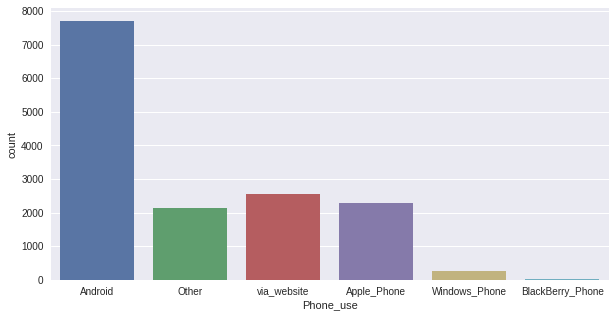

In [7]:
plt.figure(figsize=[10,5])
sns.countplot(x='Phone_use', data= tweets)
plt.show()

From Pie Chat we see that 51% of twitter handler of this data set has android phone.

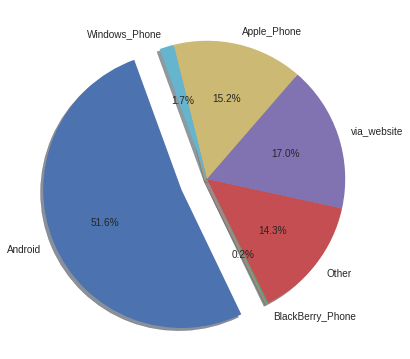

In [8]:
phones = ['Android','BlackBerry_Phone','Other', 'via_website', 'Apple_Phone', 'Windows_Phone']
count = []
for i in phones:
    k = tweets[tweets['Phone_use'] == i]
    j = k.Phone_use.count()
    count.append(j)

perc = []
numb = [0,1,2,3,4,5]
for i in numb:
    p = (count[i]/(count[0] +count[1]+count[2]+count[3]+count[4]+count[5]))*100
    perc.append(p)
    
perc_new = []
for i in perc:
    k = "%.2f" % i
    perc_new.append(k)
#---------------------##------------------------------------###-----------------------    
from pylab import *
%matplotlib inline
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Android','BlackBerry_Phone','Other', 'via_website', 'Apple_Phone', 'Windows_Phone'
fracs = perc_new
explode=(0.2, 0, 0, 0,0 ,0)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=110)
plt.show()

## Analyzing the date pattern ##
As we can see the date pattern in the dataset constitutes the month of November and April. 
November -2 days
April - 11 days 
So instead on analyzing for 13 days, I have considered only 2 categorical value. i.e Nov and Apr.
Also... Nov(which has just 2 days data) has maximum number of tweets than Apr(which has 11 days data). This was expected as demonetization happened on Nov and as time passed, the matter dried up.  

['2016-11-23' '2016-11-22' '2017-04-21' '2017-04-20' '2017-04-19'
 '2017-04-18' '2017-04-17' '2017-04-16' '2017-04-15' '2017-04-14'
 '2017-04-13' '2017-04-12' '2017-04-11']
0    Nov
1    Nov
Name: date, dtype: object
Month: Nov  -> 8000
Month: Apr  -> 6940


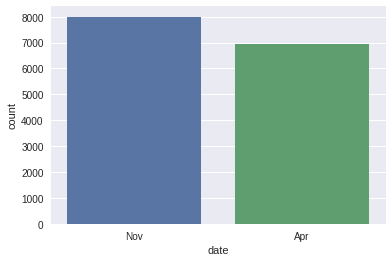

In [9]:
tweets['date'] = tweets['created'].str.extract('(....-..-..)', expand = False)
print (tweets['date'].unique())
tweets['date'] = tweets['created'].str.extract('(-..)', expand = False) # -11,-4
tweets['date'] = tweets['date'].str.strip('-') #11,4
tweets['date'] = tweets['date'].replace('11', 'Nov')# 11 to Nov
tweets['date'] = tweets['date'].replace('04', 'Apr')# 04 to Apr
print (tweets['date'].head(2))
month = ['Nov','Apr']
for i in month:
    j = tweets[(tweets['date'] == i)]
    c = j.date.count()
    print ('Month:',i,' ->',c)
    
#---------------------------------------------------------------------------------
sns.countplot(x= 'date', data = tweets)
plt.show()

## Analyzing maximum RT's ##
Since demonetization was done my Modi, so I guess he should his name maximum number of times in RT's.
I found out the following Political personalities in the dataset. There can be many more as well. I have considered only the handful that I got.
Following names I have taken under consideration: 

 1. Modi ('narendramodi)'- PM of India
 2. Sushma Swaraj ('SushmaSwaraj') - Central Minister
 3. Prime Minister Ofice('PMOIndia')
 4. RBI
 5. Arun Jaitley('arunjaitley')- FM of India
 6. Rahul Gandhi ('OfficeOfRG')- Opposition
 7. Arvind Kejriwal('ArvindKejriwal') - Leader Opposition
 8. Mamta Banerjee('MamataOfficial')- Leader Opposition
 9. Sitaram Yechury('SitaramYechury') -Leader Opposition
 10. Finance Ministery of India ('FinMinIndia')
 11. Shaktikant Das('DasShaktikanta') Finance Secretaryat the time of demoetization
 12. Smriti Irani ('smritiirani')- Central Minister
 13. Shashi Tharoor('ShashiTharoor')-Leader Opposition

Surprisingly, Shashi Tharoor has max number of RT's with his name followed by Narendra Modi for November
but for month of April, Modi has more number of tweets.


=============Month of November======================
              Name  Total_tweets
0   narendramodi    100         
1   SushmaSwaraj    0           
2   PMOIndia        19          
3   RBI             5           
4   arunjaitley     9           
5   OfficeOfRG      5           
6   ArvindKejriwal  29          
7   MamataOfficial  6           
8   SitaramYechury  2           
9   FinMinIndia     1           
10  DasShaktikanta  18          
11  smritiirani     0           
12  ShashiTharoor   147         


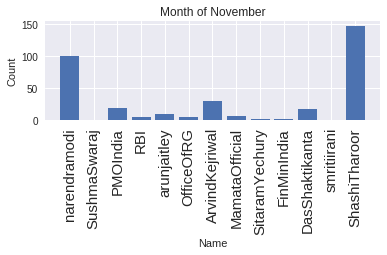

=============Month of April=========================
              Name  Total_tweets
0   narendramodi    81          
1   SushmaSwaraj    4           
2   PMOIndia        16          
3   RBI             2           
4   arunjaitley     5           
5   OfficeOfRG      7           
6   ArvindKejriwal  8           
7   MamataOfficial  0           
8   SitaramYechury  3           
9   FinMinIndia     2           
10  DasShaktikanta  0           
11  smritiirani     1           
12  ShashiTharoor   73          


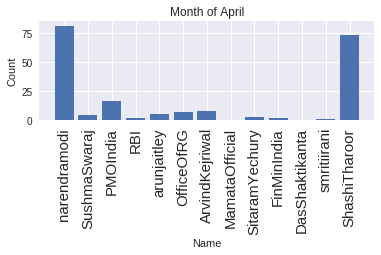

In [10]:
name =['narendramodi','SushmaSwaraj','PMOIndia','RBI','arunjaitley','OfficeOfRG',
       'ArvindKejriwal','MamataOfficial','SitaramYechury','FinMinIndia','DasShaktikanta',
       'smritiirani','ShashiTharoor']
Total_nov = []
Total_apr = []
# For november------------------------------------------------------------
for i in name:
    name_find_nov = tweets[(tweets['Text_os'] == i) & (tweets['date'] == 'Nov')]
    name_find_total_nov = name_find_nov.Text_os.count()
    Total_nov.append(name_find_total_nov)
#For April-------------------------------------------------------------------
for k in name:
    name_find_apr = tweets[(tweets['Text_os'] == k) & (tweets['date'] == 'Apr')]
    name_find_total_apr = name_find_apr.Text_os.count()
    Total_apr.append(name_find_total_apr)
##I dont know why I am not able to use 'name' and 'Total' directly. So I appended the same data in
##new_name_nov(apr) and new_total_nov(apr), its working fine.
new_name_nov = []
new_total_nov = []
new_name_apr = []
new_total_apr = []
#-----------------------------
for i in name:
    new_name_nov.append(i)
for k in Total_nov:
    new_total_nov.append(k)
#-----------------------------
for i in name:
    new_name_apr.append(i)
for k in Total_apr:
    new_total_apr.append(k)
#---------------Print the same----------------------------------
print('=============Month of November======================')
dn = {'Name' : pd.Series(new_name_nov),
    'Total_tweets': pd.Series(new_total_nov)}
dfn = pd.DataFrame(dn)
print (dfn)
#Ploting the graph-------------------------------------------------------
plt.figure(1)
plt.subplot(211)
new_na_nov = np.arange(len(new_name_nov))
plt.bar(new_na_nov, new_total_nov)
plt.xticks(new_na_nov, new_name_nov, rotation = 90,size=15)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Month of November')
plt.show()
#------------------------------------------
print('=============Month of April=========================')
da = {'Name' : pd.Series(new_name_apr),
    'Total_tweets': pd.Series(new_total_apr)}
dfa = pd.DataFrame(da)
print (dfa)
#------------------------------------------------------------------
plt.figure(2)
plt.subplot(212)
new_na_apr = np.arange(len(new_name_apr))
plt.bar(new_na_apr, new_total_apr)
plt.xticks(new_na_apr, new_name_apr, rotation = 90,size=15)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Month of April')
plt.show()

## Time analysis ##
November: Since the matter was hot, so the tweets frequency was high. People have tweeted almost all the time, evening time tweets were pretty less. Afternoon to 5 pm, tweets frequencies were very high.


April: By April the tweets should have a bit less, but we can see that there has been sudden spike in the tweets. May be some new incident related to demonetization have come up. 

Month of: Nov


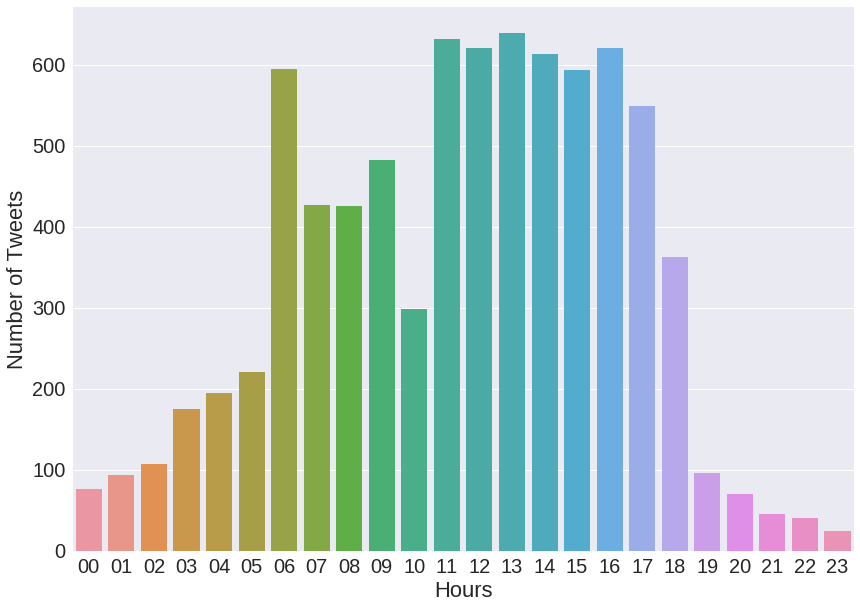

Month of: Apr


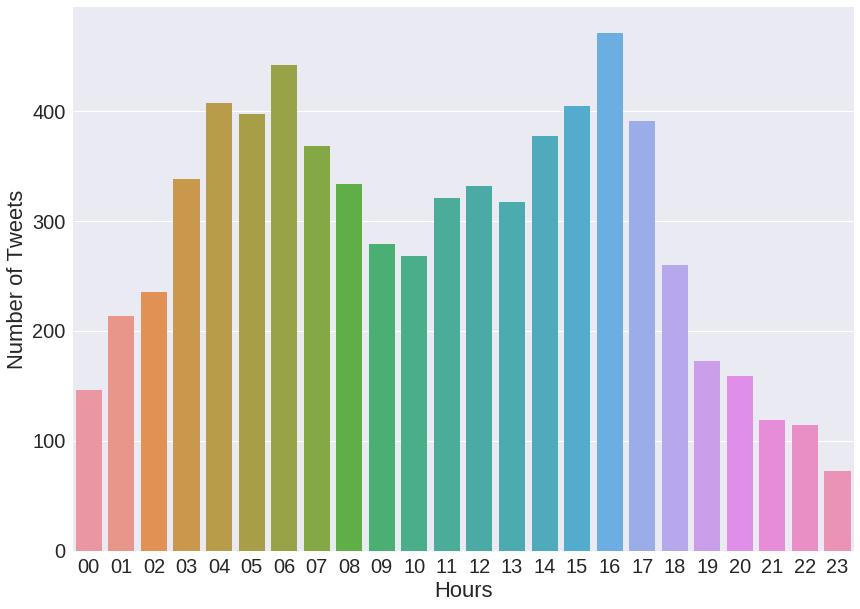

In [39]:
#from Tkinter import *
#import Tkinter as tk
#root = tk.Tk()
#x = Label(text='Hours', font = (None,10))
tweets['time'] = tweets['created'].str.extract('(..:)', expand = False)
tweets['time'] = tweets['time'].str.strip(':')
for i in month:
    b = tweets[tweets['date'] == i]
    print ('Month of:',i)
    width = 14
    height = 10
    plt.figure(figsize = (width,height))
    sns.set(font_scale=2)
    sns.countplot(x= 'time', data = b)
    plt.xlabel('Hours')
    plt.ylabel('Number of Tweets')
    plt.show()